# ***Data Precprocessing***

In [ ]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-null  int64  
 14  Hear

In [ ]:
train.head()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


In [ ]:
train.isnull().sum()

,0
id,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270000 entries, 0 to 269999
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       270000 non-null  int64  
 1   Age                      270000 non-null  int64  
 2   Sex                      270000 non-null  int64  
 3   Chest pain type          270000 non-null  int64  
 4   BP                       270000 non-null  int64  
 5   Cholesterol              270000 non-null  int64  
 6   FBS over 120             270000 non-null  int64  
 7   EKG results              270000 non-null  int64  
 8   Max HR                   270000 non-null  int64  
 9   Exercise angina          270000 non-null  int64  
 10  ST depression            270000 non-null  float64
 11  Slope of ST              270000 non-null  int64  
 12  Number of vessels fluro  270000 non-null  int64  
 13  Thallium                 270000 non-null  int64  
dtypes: f

In [ ]:
test.isnull().sum()

,0
id,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0


In [ ]:
train['Heart Disease']= train['Heart Disease'].map({'Presence':1 , 'Absence':0})


In [ ]:
train.head()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,1
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,0
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,0
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,0
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,1


In [ ]:
bins=[20,30,40,50,60,70,80,90]
labels =['20s', '30s','40s','50s','60s','70s','80s']
train['Age_Group'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)
test['Age_Group'] = pd.cut(test['Age'], bins=bins, labels=labels, right=False)
train.drop('Age', axis=1, inplace=True)
test.drop('Age', axis=1, inplace=True)


In [ ]:
train.drop('id', axis=1, inplace=True)
train.head()

,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,Age_Group
0,1,4,152,239,0,0,158,1,3.6,2,2,7,1,50s
1,1,1,125,325,0,2,171,0,0.0,1,0,3,0,50s
2,0,2,160,188,0,2,151,0,0.0,1,0,3,0,50s
3,0,3,134,229,0,2,150,0,1.0,2,0,3,0,40s
4,1,4,140,234,0,2,125,1,3.8,2,3,3,1,50s


# ***Feature Engineering***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Sex                      630000 non-null  int64   
 1   Chest pain type          630000 non-null  int64   
 2   BP                       630000 non-null  int64   
 3   Cholesterol              630000 non-null  int64   
 4   FBS over 120             630000 non-null  int64   
 5   EKG results              630000 non-null  int64   
 6   Max HR                   630000 non-null  int64   
 7   Exercise angina          630000 non-null  int64   
 8   ST depression            630000 non-null  float64 
 9   Slope of ST              630000 non-null  int64   
 10  Number of vessels fluro  630000 non-null  int64   
 11  Thallium                 630000 non-null  int64   
 12  Heart Disease            630000 non-null  int64   
 13  Age_Group                630000 non-null  ca

In [ ]:
#setting priority
prior_map ={4:5,3:2, 2:1 ,1:0}
labels =['20s', '30s','40s','50s','60s','70s','80s']
prioe_map ={'20s':0, '30s':1,'40s':2,'50s':3,'60s':4, '70s':6,'80s': 7}
train['Chest pain type'] = train['Chest pain type'].map(prior_map)
test['Chest pain type'] = test['Chest pain type'].map(prior_map)
train['Age_Group'] = train['Age_Group'].map(prioe_map)
test['Age_Group'] = test['Age_Group'].map(prioe_map)

thallium_map = {3: 0, 6: 2, 7: 5}
train['Thallium'] = train['Thallium'].map(thallium_map)
test['Thallium'] = test['Thallium'].map(thallium_map)

lope_map = {1: 0, 2: 2, 3: 4}
train['Slope of ST'] = train['Slope of ST'].map(lope_map)
test['Slope of ST'] = test['Slope of ST'].map(lope_map)

train['Pain_Angina_Priority'] = (train['Chest pain type'] * 2) + train['Exercise angina']
test['Pain_Angina_Priority'] = (test['Chest pain type'] * 2) + test['Exercise angina']

vessel_map = {0: 0, 1: 2, 2: 4, 3: 6}
train['Number of vessels fluro'] = train['Number of vessels fluro'].map(vessel_map)
test['Number of vessels fluro'] = test['Number of vessels fluro'].map(vessel_map)





In [ ]:
train.head()

,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,Age_Group,Pain_Angina_Priority
0,1,5,152,239,0,0,158,1,3.6,2,4,5,1,3,11
1,1,0,125,325,0,2,171,0,0.0,0,0,0,0,3,0
2,0,1,160,188,0,2,151,0,0.0,0,0,0,0,3,2
3,0,2,134,229,0,2,150,0,1.0,2,0,0,0,2,4
4,1,5,140,234,0,2,125,1,3.8,2,6,0,1,3,11


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Sex                      630000 non-null  int64   
 1   Chest pain type          630000 non-null  int64   
 2   BP                       630000 non-null  int64   
 3   Cholesterol              630000 non-null  int64   
 4   FBS over 120             630000 non-null  int64   
 5   EKG results              630000 non-null  int64   
 6   Max HR                   630000 non-null  int64   
 7   Exercise angina          630000 non-null  int64   
 8   ST depression            630000 non-null  float64 
 9   Slope of ST              630000 non-null  int64   
 10  Number of vessels fluro  630000 non-null  int64   
 11  Thallium                 630000 non-null  int64   
 12  Heart Disease            630000 non-null  int64   
 13  Age_Group                630000 non-null  ca

In [ ]:
train['Silent_Risk'] = ((train['Chest pain type'] == 5).astype(int) * ((train['BP'] > 140) | (train['Exercise angina'] == 1)).astype(int))
test['Silent_Risk'] = ((test['Chest pain type'] == 5).astype(int) * ((test['BP'] > 140) | (test['Exercise angina'] == 1)).astype(int))

In [ ]:
train['ST_Severity'] = train['ST depression'] * (train['Slope of ST'] + 1)
test['ST_Severity'] = test['ST depression'] * (test['Slope of ST'] + 1)

In [ ]:
train['Heart_Stress_Index'] = (train['BP'] * train['Max HR']) / 1000
test['Heart_Stress_Index'] = (test['BP'] * test['Max HR']) / 1000
train['Metabolic_Score'] = ((train['BP'] > 130).astype(int) +
                            (train['Cholesterol'] > 200).astype(int) +
                            train['FBS over 120'])
test['Metabolic_Score'] = ((test['BP'] > 130).astype(int) +
                           (test['Cholesterol'] > 200).astype(int) +
                           test['FBS over 120'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Sex                      630000 non-null  int64   
 1   Chest pain type          630000 non-null  int64   
 2   BP                       630000 non-null  int64   
 3   Cholesterol              630000 non-null  int64   
 4   FBS over 120             630000 non-null  int64   
 5   EKG results              630000 non-null  int64   
 6   Max HR                   630000 non-null  int64   
 7   Exercise angina          630000 non-null  int64   
 8   ST depression            630000 non-null  float64 
 9   Slope of ST              630000 non-null  int64   
 10  Number of vessels fluro  630000 non-null  int64   
 11  Thallium                 630000 non-null  int64   
 12  Heart Disease            630000 non-null  int64   
 13  Age_Group                630000 non-null  ca

In [ ]:
train.head()

,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,Age_Group,Pain_Angina_Priority,Silent_Risk,ST_Severity,Heart_Stress_Index,Metabolic_Score
0,1,5,152,239,0,0,158,1,3.6,2,4,5,1,3,11,1,10.8,24.016,2
1,1,0,125,325,0,2,171,0,0.0,0,0,0,0,3,0,0,0.0,21.375,1
2,0,1,160,188,0,2,151,0,0.0,0,0,0,0,3,2,0,0.0,24.160,1
3,0,2,134,229,0,2,150,0,1.0,2,0,0,0,2,4,0,3.0,20.100,2
4,1,5,140,234,0,2,125,1,3.8,2,6,0,1,3,11,1,11.4,17.500,2


In [ ]:
#binning
# Hypertension flag (Blood Pressure > 140)
train['Is_Hypertensive'] = (train['BP'] > 140).astype(int)
test['Is_Hypertensive'] = (test['BP'] > 140).astype(int)

# High Cholesterol flag (Cholesterol > 240)
train['High_Cholesterol'] = (train['Cholesterol'] > 240).astype(int)
test['High_Cholesterol'] = (test['Cholesterol'] > 240).astype(int)

In [ ]:
# Combining the two most powerful predictors
train['Vessel_Thal_Priority'] = train['Number of vessels fluro'] * train['Thallium']
test['Vessel_Thal_Priority'] = test['Number of vessels fluro'] * test['Thallium']

In [ ]:
# Example of Target Encoding for Age_Group
age_risk_map = train.groupby('Age_Group')['Heart Disease'].mean().to_dict()
train['Age_Group_Risk'] = train['Age_Group'].map(age_risk_map)
test['Age_Group_Risk'] = test['Age_Group'].map(age_risk_map)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Sex                      630000 non-null  int64   
 1   Chest pain type          630000 non-null  int64   
 2   BP                       630000 non-null  int64   
 3   Cholesterol              630000 non-null  int64   
 4   FBS over 120             630000 non-null  int64   
 5   EKG results              630000 non-null  int64   
 6   Max HR                   630000 non-null  int64   
 7   Exercise angina          630000 non-null  int64   
 8   ST depression            630000 non-null  float64 
 9   Slope of ST              630000 non-null  int64   
 10  Number of vessels fluro  630000 non-null  int64   
 11  Thallium                 630000 non-null  int64   
 12  Heart Disease            630000 non-null  int64   
 13  Age_Group                630000 non-null  ca

***ADVANCED FEATURING ENGINEERING***

In [ ]:

train['Total_Severity'] = train['Vessel_Thal_Priority'] + train['Pain_Angina_Priority'] + train['ST_Severity']
test['Total_Severity'] = test['Vessel_Thal_Priority'] + test['Pain_Angina_Priority'] + test['ST_Severity']

In [ ]:
#GENDER SPECIFIC
train['Sex_Thal_Risk'] = train['Sex'] * train['Thallium']
train['Sex_Vessels_Risk'] = train['Sex'] * train['Number of vessels fluro']

test['Sex_Thal_Risk'] = test['Sex'] * test['Thallium']
test['Sex_Vessels_Risk'] = test['Sex'] * test['Number of vessels fluro']

In [ ]:
#EKG IS RELATED TO PAIN
train['Pain_ST_Interaction'] = train['Chest pain type'] * train['ST depression']
test['Pain_ST_Interaction'] = test['Chest pain type'] * test['ST depression']

In [ ]:
#HEART RATE
age_midpoint_map = {0: 25, 1: 35, 2: 45, 3: 55, 4: 65, 6: 75, 7: 85}
train['Age_Midpoint'] = train['Age_Group'].map(age_midpoint_map).astype(float)
test['Age_Midpoint'] = test['Age_Group'].map(age_midpoint_map).astype(float)

train['HR_Relative_to_Age'] = train['Max HR'] / (220 - train['Age_Midpoint'])
test['HR_Relative_to_Age'] = test['Max HR'] / (220 - test['Age_Midpoint'])

train.drop('Age_Midpoint', axis=1, inplace=True)
test.drop('Age_Midpoint', axis=1, inplace=True)

In [ ]:
print(train.head())
print(train.info())
print(test.head())
print(test.info())

   Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  Max HR  \
0    1                5  152          239             0            0     158   
1    1                0  125          325             0            2     171   
2    0                1  160          188             0            2     151   
3    0                2  134          229             0            2     150   
4    1                5  140          234             0            2     125   

   Exercise angina  ST depression  Slope of ST  ...  Metabolic_Score  \
0                1            3.6            2  ...                2   
1                0            0.0            0  ...                1   
2                0            0.0            0  ...                1   
3                0            1.0            2  ...                2   
4                1            3.8            2  ...                2   

   Is_Hypertensive  High_Cholesterol Vessel_Thal_Priority  Age_Group_Risk  \
0        

In [ ]:
cols_to_drop = [
    'id',              # Just a serial number
    'Age',             # We have Age_Group and HR_Relative_to_Age
    'Age_Group',       # We have Age_Group_Risk
    'EKG results'      # Often very low importance compared to ST_Severity
]
train_final = train.drop(columns=[c for c in cols_to_drop if c in train.columns], errors='ignore')
test_final = test.drop(columns=[c for c in cols_to_drop if c in test.columns], errors='ignore')


In [ ]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Sex                      630000 non-null  int64  
 1   Chest pain type          630000 non-null  int64  
 2   BP                       630000 non-null  int64  
 3   Cholesterol              630000 non-null  int64  
 4   FBS over 120             630000 non-null  int64  
 5   Max HR                   630000 non-null  int64  
 6   Exercise angina          630000 non-null  int64  
 7   ST depression            630000 non-null  float64
 8   Slope of ST              630000 non-null  int64  
 9   Number of vessels fluro  630000 non-null  int64  
 10  Thallium                 630000 non-null  int64  
 11  Heart Disease            630000 non-null  int64  
 12  Pain_Angina_Priority     630000 non-null  int64  
 13  Silent_Risk              630000 non-null  int64  
 14  ST_S

In [ ]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270000 entries, 0 to 269999
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Sex                      270000 non-null  int64  
 1   Chest pain type          270000 non-null  int64  
 2   BP                       270000 non-null  int64  
 3   Cholesterol              270000 non-null  int64  
 4   FBS over 120             270000 non-null  int64  
 5   Max HR                   270000 non-null  int64  
 6   Exercise angina          270000 non-null  int64  
 7   ST depression            270000 non-null  float64
 8   Slope of ST              270000 non-null  int64  
 9   Number of vessels fluro  270000 non-null  int64  
 10  Thallium                 270000 non-null  int64  
 11  Pain_Angina_Priority     270000 non-null  int64  
 12  Silent_Risk              270000 non-null  int64  
 13  ST_Severity              270000 non-null  float64
 14  Hear

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Split into training and validation sets
from sklearn.model_selection import train_test_split

# Define features and target using your final dataframe
X = train_final.drop('Heart Disease', axis=1)
y = train_final['Heart Disease']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2026, stratify=y)

print("Data successfully split for modeling!")

param_grid_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 15, 20, 25, None],
    'min_samples_split': [4, 7, 10, 12],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=2026)

random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid_rf,
    n_iter=20,          # <--- This is the 'speed' dial (increase for more accuracy)
    cv=5,               # 5-fold cross-validation
    n_jobs=-1,          # Uses all CPU cores
    verbose=1,
    random_state=2026   # Keeps your future-synced seed!
)

print("Starting Randomized Search... this will be MUCH faster!")
random_search_rf.fit(X_train, y_train)

print(f"Best RF Parameters: {random_search_rf.best_params_}")
print(f"Best RF Accuracy: {random_search_rf.best_score_:.2%}")

Data successfully split for modeling!
Starting Randomized Search... this will be MUCH faster!
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best RF Parameters: {'n_estimators': 200, 'min_samples_split': 12, 'max_features': 'sqrt', 'max_depth': 15}
Best RF Accuracy: 88.40%


In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.7/131.7 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.8/289.8 MB 1.3 MB/s eta 0:00:00


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.89      0.90      0.90     69509
           1       0.88      0.86      0.87     56491

    accuracy                           0.88    126000
   macro avg       0.88      0.88      0.88    126000
weighted avg       0.88      0.88      0.88    126000



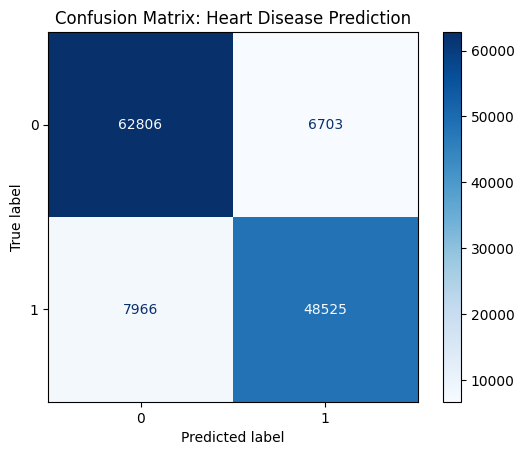

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Use the best model found by the search
best_rf = random_search_rf.best_estimator_

# Predict on the validation set
y_pred = best_rf.predict(X_val)

# Check the results
print("--- Classification Report ---")
print(classification_report(y_val, y_pred))

# Plot the Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_rf, X_val, y_val, cmap='Blues')
plt.title("Confusion Matrix: Heart Disease Prediction")
plt.show()

In [ ]:
import pandas as pd

# 1. Load raw test data and keep IDs
test_df = pd.read_csv('test.csv')
test_ids = test_df['id']

# 2. Define the Mappings (Ensure these match your training code exactly)
prior_map = {4: 5, 3: 2, 2: 1, 1: 0}
thallium_map = {3: 0, 6: 2, 7: 5}
lope_map = {1: 0, 2: 2, 3: 4}
vessel_map = {0: 0, 1: 2, 2: 4, 3: 6}
prioe_map = {'20s': 0, '30s': 1, '40s': 2, '50s': 3, '60s': 4, '70s': 6, '80s': 7}
age_midpoint_map = {0: 25, 1: 35, 2: 45, 3: 55, 4: 65, 6: 75, 7: 85}

# 3. Apply Feature Engineering to test_df
# Age Grouping
bins = [20, 30, 40, 50, 60, 70, 80, 90]
labels = ['20s', '30s', '40s', '50s', '60s', '70s', '80s']
test_df['Age_Group'] = pd.cut(test_df['Age'], bins=bins, labels=labels, right=False)

# Mapping original columns
test_df['Chest pain type'] = test_df['Chest pain type'].map(prior_map)
test_df['Thallium'] = test_df['Thallium'].map(thallium_map)
test_df['Slope of ST'] = test_df['Slope of ST'].map(lope_map)
test_df['Number of vessels fluro'] = test_df['Number of vessels fluro'].map(vessel_map)
test_df['Age_Group'] = test_df['Age_Group'].map(prioe_map)

# Calculated Features
test_df['Pain_Angina_Priority'] = (test_df['Chest pain type'] * 2) + test_df['Exercise angina']
test_df['Silent_Risk'] = ((test_df['Chest pain type'] == 5).astype(int) * ((test_df['BP'] > 140) | (test_df['Exercise angina'] == 1)).astype(int))
test_df['ST_Severity'] = test_df['ST depression'] * (test_df['Slope of ST'] + 1)
test_df['Heart_Stress_Index'] = (test_df['BP'] * test_df['Max HR']) / 1000
test_df['Metabolic_Score'] = ((test_df['BP'] > 130).astype(int) + (test_df['Cholesterol'] > 200).astype(int) + test_df['FBS over 120'])
test_df['Vessel_Thal_Priority'] = test_df['Number of vessels fluro'] * test_df['Thallium']
test_df['Total_Severity'] = test_df['Vessel_Thal_Priority'] + test_df['Pain_Angina_Priority'] + test_df['ST_Severity']
test_df['Sex_Thal_Risk'] = test_df['Sex'] * test_df['Thallium']
test_df['Sex_Vessels_Risk'] = test_df['Sex'] * test_df['Number of vessels fluro']
test_df['Pain_ST_Interaction'] = test_df['Chest pain type'] * test_df['ST depression']
test_df['Is_Hypertensive'] = (test_df['BP'] > 140).astype(int)
test_df['High_Cholesterol'] = (test_df['Cholesterol'] > 240).astype(int)

# Age Risk (Calculating from training data context)
age_risk_map = train.groupby('Age_Group')['Heart Disease'].mean().to_dict()
test_df['Age_Group_Risk'] = test_df['Age_Group'].map(age_risk_map)

# HR Relative to Age
test_df['Age_Midpoint'] = test_df['Age_Group'].map(age_midpoint_map).astype(float)
test_df['HR_Relative_to_Age'] = test_df['Max HR'] / (220 - test_df['Age_Midpoint'])

# 4. Final Alignment and Prediction
# This ensures test_df has the EXACT same columns as X_train
X_test = test_df[X_train.columns]

# Predict
best_rf = random_search_rf.best_estimator_
raw_predictions = best_rf.predict(X_test)

# Convert labels ('Absence'/'Presence') to 0/1 for submission
mapping = {'Absence': 0, 'Presence': 1}
final_predictions = [mapping.get(p, p) for p in raw_predictions]

# 5. Save the final file
submission = pd.DataFrame({'id': test_ids, 'Heart Disease': final_predictions})
submission.to_csv('final_submission.csv', index=False)

print("Final submission file 'final_submission.csv' is ready!")

Final submission file 'final_submission.csv' is ready!


In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    random_state=2026,
    tree_method='hist' # Uses histogram-based split finding for massive speed-up on 630k rows
)

param_grid_xgb = {
    'n_estimators': [300, 500 , 600],
    'learning_rate': [0.01, 0.05, 0.1, 0.005],
    'max_depth': [6, 8, 10 , 13],
    'subsample': [0.8,0.6, 1.0 ],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid_xgb,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=2026
)

print("Starting XGBoost Search...")
random_search_xgb.fit(X_train, y_train)

print(f"Best XGB Parameters: {random_search_xgb.best_params_}")
print(f"Best XGB Accuracy: {random_search_xgb.best_score_:.2%}")

Starting XGBoost Search...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best XGB Parameters: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 1.0}
Best XGB Accuracy: 88.66%


# RUNTIME DISCONNECTED SO DOING THIS TO JUST GET PERFECT ANSWER


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

# 1. RELOAD DATA
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_ids = test['id']

# 2. FEATURE ENGINEERING RECIPE (Restoring the 'Brain')
prior_map = {4: 5, 3: 2, 2: 1, 1: 0}
thallium_map = {3: 0, 6: 2, 7: 5}
lope_map = {1: 0, 2: 2, 3: 4}
vessel_map = {0: 0, 1: 2, 2: 4, 3: 6}
prioe_map = {'20s': 0, '30s': 1, '40s': 2, '50s': 3, '60s': 4, '70s': 6, '80s': 7}
age_midpoint_map = {0: 25, 1: 35, 2: 45, 3: 55, 4: 65, 6: 75, 7: 85}

def apply_features(df):
    df = df.copy()
    bins = [20, 30, 40, 50, 60, 70, 80, 90]
    labels = ['20s', '30s', '40s', '50s', '60s', '70s', '80s']
    df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

    df['Chest pain type'] = df['Chest pain type'].map(prior_map)
    df['Thallium'] = df['Thallium'].map(thallium_map)
    df['Slope of ST'] = df['Slope of ST'].map(lope_map)
    df['Number of vessels fluro'] = df['Number of vessels fluro'].map(vessel_map)
    df['Age_Group'] = df['Age_Group'].map(prioe_map)

    df['Pain_Angina_Priority'] = (df['Chest pain type'] * 2) + df['Exercise angina']
    df['Silent_Risk'] = ((df['Chest pain type'] == 5).astype(int) * ((df['BP'] > 140) | (df['Exercise angina'] == 1)).astype(int))
    df['ST_Severity'] = df['ST depression'] * (df['Slope of ST'] + 1)
    df['Heart_Stress_Index'] = (df['BP'] * df['Max HR']) / 1000
    df['Metabolic_Score'] = ((df['BP'] > 130).astype(int) + (df['Cholesterol'] > 200).astype(int) + df['FBS over 120'])
    df['Vessel_Thal_Priority'] = df['Number of vessels fluro'] * df['Thallium']
    df['Total_Severity'] = df['Vessel_Thal_Priority'] + df['Pain_Angina_Priority'] + df['ST_Severity']
    df['Sex_Thal_Risk'] = df['Sex'] * df['Thallium']
    df['Sex_Vessels_Risk'] = df['Sex'] * df['Number of vessels fluro']
    df['Pain_ST_Interaction'] = df['Chest pain type'] * df['ST depression']
    df['Is_Hypertensive'] = (df['BP'] > 140).astype(int)
    df['High_Cholesterol'] = (df['Cholesterol'] > 240).astype(int)

    df['Age_Midpoint'] = df['Age_Group'].map(age_midpoint_map).astype(float)
    df['HR_Relative_to_Age'] = df['Max HR'] / (220 - df['Age_Midpoint'])
    return df

# Apply to both
train_fe = apply_features(train)
test_fe = apply_features(test)

# Target Encoding for Age_Group_Risk (using Train data only to avoid leak)
age_risk_map = train_fe.groupby('Age_Group')['Heart Disease'].apply(lambda x: (x == 'Presence').mean()).to_dict()
train_fe['Age_Group_Risk'] = train_fe['Age_Group'].map(age_risk_map)
test_fe['Age_Group_Risk'] = test_fe['Age_Group'].map(age_risk_map)

# 3. PREPARE X and Y
cols_to_drop = ['id', 'Age', 'Age_Group', 'EKG results', 'Heart Disease', 'Age_Midpoint']
X_train = train_fe.drop(columns=[c for c in cols_to_drop if c in train_fe.columns], errors='ignore')
y_train = train_fe['Heart Disease'].map({'Absence': 0, 'Presence': 1})
X_test = test_fe[X_train.columns]

# 4. INSTANT TRAINING (Using your 88%+ winners)
print("Re-training best models...")
best_rf = RandomForestClassifier(n_estimators=200, min_samples_split=12, max_features='sqrt', max_depth=15, random_state=2026)
best_rf.fit(X_train, y_train)

best_xgb = xgb.XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=2026, tree_method='hist')
best_xgb.fit(X_train, y_train)

/tmp/ipython-input-1696369036.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_risk_map = train_fe.groupby('Age_Group')['Heart Disease'].apply(lambda x: (x == 'Presence').mean()).to_dict()


Re-training best models...


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# 5. ENSEMBLE SUBMISSION
print("Creating Ensemble Submission...")
rf_probs = best_rf.predict_proba(X_test)[:, 1]
xgb_probs = best_xgb.predict_proba(X_test)[:, 1]
ensemble_probs = (0.4 * rf_probs) + (0.6 * xgb_probs)
final_preds = (ensemble_probs >= 0.5).astype(int)

submission = pd.DataFrame({'id': test_ids, 'Heart Disease': final_preds})
submission.to_csv('ensemble_submission.csv', index=False)
print("Done! 'ensemble_submission.csv' is ready.")

Creating Ensemble Submission...
Done! 'ensemble_submission.csv' is ready.


# ENSEMBLE


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier



print("Updating models with the EXACT 'Best' parameters...")

# 2. RF with your Best Parameters:
# {'n_estimators': 200, 'min_samples_split': 12, 'max_features': 'sqrt', 'max_depth': 15}
best_rf = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=12,
    max_features='sqrt',
    max_depth=15,
    random_state=2026,
    n_jobs=-1
)
best_rf.fit(X_train, y_train)

# 3. XGBoost with your Best Parameters:
# {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 1.0}
best_xgb = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=1.0,
    gamma=0.2,
    colsample_bytree=1.0,
    random_state=2026,
    tree_method='hist'
)
best_xgb.fit(X_train, y_train)

# 4. Final Ensemble and CSV Generation
rf_probs = best_rf.predict_proba(X_test)[:, 1]
xgb_probs = best_xgb.predict_proba(X_test)[:, 1]

# Giving XGBoost 60% weight because it has the higher score (88.66%)
ensemble_probs = (0.4 * rf_probs) + (0.6 * xgb_probs)
final_preds = (ensemble_probs >= 0.5).astype(int)

submission = pd.DataFrame({'id': test_ids, 'Heart Disease': final_preds})
submission.to_csv('optimized_ensemble_submission.csv', index=False)

print("Optimized submission 'optimized_ensemble_submission.csv' is ready!")

Updating models with the EXACT 'Best' parameters...
Optimized submission 'optimized_ensemble_submission.csv' is ready!


Memory cleared. We need to reload or rerun.


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_ids = test['id']
prior_map = {4: 5, 3: 2, 2: 1, 1: 0}
thallium_map = {3: 0, 6: 2, 7: 5}
lope_map = {1: 0, 2: 2, 3: 4}
vessel_map = {0: 0, 1: 2, 2: 4, 3: 6}
prioe_map = {'20s': 0, '30s': 1, '40s': 2, '50s': 3, '60s': 4, '70s': 6, '80s': 7}
age_midpoint_map = {0: 25, 1: 35, 2: 45, 3: 55, 4: 65, 6: 75, 7: 85}

def apply_features(df):
    df = df.copy()
    bins = [20, 30, 40, 50, 60, 70, 80, 90]
    labels = ['20s', '30s', '40s', '50s', '60s', '70s', '80s']
    df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

    df['Chest pain type'] = df['Chest pain type'].map(prior_map)
    df['Thallium'] = df['Thallium'].map(thallium_map)
    df['Slope of ST'] = df['Slope of ST'].map(lope_map)
    df['Number of vessels fluro'] = df['Number of vessels fluro'].map(vessel_map)
    df['Age_Group'] = df['Age_Group'].map(prioe_map)

    df['Pain_Angina_Priority'] = (df['Chest pain type'] * 2) + df['Exercise angina']
    df['Silent_Risk'] = ((df['Chest pain type'] == 5).astype(int) * ((df['BP'] > 140) | (df['Exercise angina'] == 1)).astype(int))
    df['ST_Severity'] = df['ST depression'] * (df['Slope of ST'] + 1)
    df['Heart_Stress_Index'] = (df['BP'] * df['Max HR']) / 1000
    df['Metabolic_Score'] = ((df['BP'] > 130).astype(int) + (df['Cholesterol'] > 200).astype(int) + df['FBS over 120'])
    df['Vessel_Thal_Priority'] = df['Number of vessels fluro'] * df['Thallium']
    df['Total_Severity'] = df['Vessel_Thal_Priority'] + df['Pain_Angina_Priority'] + df['ST_Severity']
    df['Sex_Thal_Risk'] = df['Sex'] * df['Thallium']
    df['Sex_Vessels_Risk'] = df['Sex'] * df['Number of vessels fluro']
    df['Pain_ST_Interaction'] = df['Chest pain type'] * df['ST depression']
    df['Is_Hypertensive'] = (df['BP'] > 140).astype(int)
    df['High_Cholesterol'] = (df['Cholesterol'] > 240).astype(int)

    df['Age_Midpoint'] = df['Age_Group'].map(age_midpoint_map).astype(float)
    df['HR_Relative_to_Age'] = df['Max HR'] / (220 - df['Age_Midpoint'])
    return df